# Data Visulization and Metrics

In [6]:
import matplotlib.pyplot as plt
import polars as pl 
import seaborn as sns 
import numpy as np

In [7]:
df = pl.read_csv('../data/final_data.csv')
winners_df = df.filter(pl.col("winner") == 1)
nominees_df = df.filter(pl.col("winner") == 0)
df

tconst,film,year_film,genres,averageRating,dir_won_before,budget,nb_actor_won_before,won_bafta,won_gg_drama,won_gg_comedy,winner
str,str,i64,str,f64,i64,f64,i64,i64,i64,i64,i64
"""tt0018379""","""7thheaven""",1927,"""Drama,Romance""",7.5,0,null,0,0,0,0,0
"""tt0018578""","""wings""",1927,"""Action,Drama,Romance""",7.5,0,2e6,0,0,0,0,1
"""tt0019257""","""thepatriot""",1928,"""Drama,History,Thriller""",null,0,null,2,0,0,0,0
"""tt0019304""","""theracket""",1927,"""Crime,Drama,Film-Noir""",6.6,0,null,0,0,0,0,0
"""tt0019630""","""alibi""",1928,"""Action,Crime,Romance""",5.6,0,null,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…
"""tt8999762""","""thebrutalist""",2024,"""Drama""",7.4,0,9.6e6,1,0,1,0,0
"""tt9620288""","""kingrichard""",2021,"""Biography,Drama,Sport""",7.5,0,null,0,0,0,0,0
"""tt9620292""","""promisingyoungwoman""",2020,"""Crime,Drama,Mystery""",7.5,0,1e7,0,0,0,0,0


## Ratings 
This section aims to explore the Average Ratings variable through plots and statistic metrics 

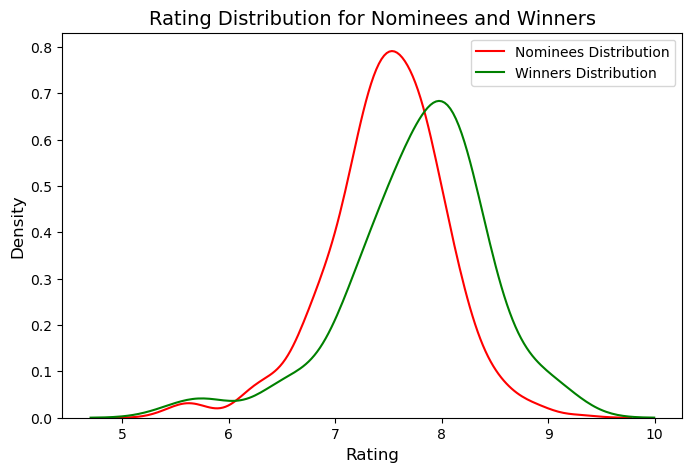

In [8]:
overall_ratings = df['averageRating']
winners_ratings = winners_df['averageRating']
nominees_ratings = nominees_df['averageRating']

#distribution plot
plt.figure(figsize=(8, 5))
sns.kdeplot(nominees_ratings, color='red', label='Nominees Distribution', fill=False)
sns.kdeplot(winners_ratings, color='green', label='Winners Distribution', fill=False)
plt.title('Rating Distribution for Nominees and Winners', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
plt.close()

The plot above illustrates the difference in rating distribution between winners and nominees. While the spread of the ratings is similar, the winners distribution is slightly more to the right, indicating that winners tend to have a higher average rating. This could indicate that rating is, as we might expect, an important information for our models.

In [10]:
df_clean_ratings = df.filter(df["averageRating"].is_not_null())
winners_df = df_clean_ratings.filter(pl.col("winner") == 1)
nominees_df = df_clean_ratings.filter(pl.col("winner") == 0)

overall_ratings = df_clean_ratings['averageRating'].to_list()
winners_ratings = winners_df['averageRating'].to_list()
nominees_ratings = nominees_df['averageRating'].to_list()

ratings_data = {
    'Group': ['Winners', 'Non-Winners', 'All Ratings'],
    'Mean': [np.mean(winners_ratings), np.mean(nominees_ratings), np.mean(overall_ratings)],
    'Median': [np.median(winners_ratings), np.median(nominees_ratings), np.median(overall_ratings)]
}
pl.DataFrame(ratings_data)

Group,Mean,Median
str,f64,f64
"""Winners""",7.773196,7.9
"""Non-Winners""",7.483821,7.5
"""All Ratings""",7.529836,7.6


The metrics above confirm the first conclusion made from the previous plot and highlights the difference in rating between winners and the other nominees.

## Budget 
This section aims to explore the budget variable through plots and statistic metrics. The budget variable is missing for a certain number of entries and will be handled carefully in the followin steps of the project. The plots and metrics below still offer an idea of its distribution and impact.

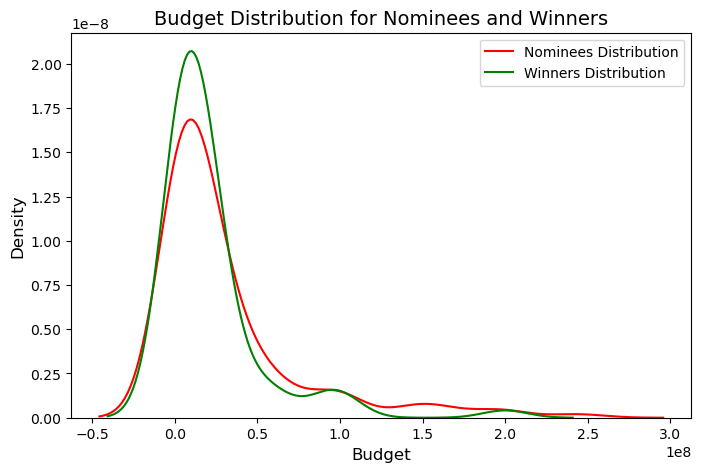

In [11]:
overall_budget = df['budget']
winners_budget = winners_df['budget']
nominees_budget = nominees_df['budget']

#distribution plot
plt.figure(figsize=(8, 5))
sns.kdeplot(nominees_budget, color='red', label='Nominees Distribution', fill=False)
sns.kdeplot(winners_budget, color='green', label='Winners Distribution', fill=False)
plt.title('Budget Distribution for Nominees and Winners', fontsize=14)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()
plt.close()

We get two key information, first, the budget distribution is right-skewed meaning more films have a lower budget. We can spot some outliers on the left of the curve implying we might need to log-transform the data if we use it in our models. Second, while it might be counterintuitive, winners are more concentrated around lower budgets. However, the difference in distribution between winners and nominees is not this significant., budget is probably not the strongest indicators. The statistics metrics below confirm this trend. 

In [12]:
df_clean_budgets = df.filter(df["budget"].is_not_null())
winners_budget_df = df_clean_budgets.filter(pl.col("winner") == 1)
nominees_budget_df = df_clean_budgets.filter(pl.col("winner") == 0)

overall_budget = df_clean_budgets["budget"].to_list()
winners_budget = winners_budget_df["budget"].to_list()
nominees_budget = nominees_budget_df["budget"].to_list()
budget_data = {
    'Group': ['Winners', 'Non-Winners', 'All Ratings'],
    'Mean': [np.mean(winners_budget), np.mean(nominees_budget), np.mean(overall_budget)],
    'Median': [np.median(winners_budget), np.median(nominees_budget), np.median(overall_budget)]
}

pl.DataFrame(budget_data)

Group,Mean,Median
str,f64,f64
"""Winners""",2.1428e7,1.32e7
"""Non-Winners""",3.1013e7,1.4e7
"""All Ratings""",2.8860e7,1.4e7


## Other awards won impact
This section studies the relationship between awards won prior to the Oscar, BAFTA and Golden Globes.

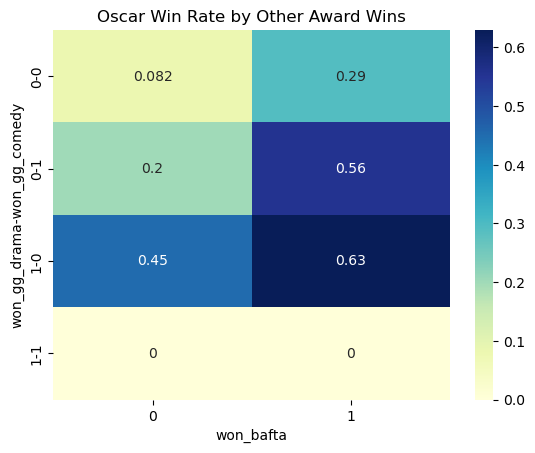

In [13]:
#HeatMap for other awards won
df_pandas = df.to_pandas()
combo = df_pandas.groupby(['won_gg_drama', 'won_gg_comedy', 'won_bafta'])['winner'].mean().unstack(fill_value=0)
sns.heatmap(combo, annot=True, cmap='YlGnBu')
plt.title("Oscar Win Rate by Other Award Wins")
plt.show()
plt.close()

On the heatmap above we can see, that winning awards have indeed great influence on the Oscar results. As an example, 63% of movies winning both the BAFTA and Golden Globes for best drama won the Oscar just after. On the other hand, the rate of Oscar winners among movies missing on the three other awards drops to 8.2%. The bottom line is 0 simply because it is impossible to win both Golden Globes prizes.